In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)



cuda


1. Develop a GRU-based encoder-decoder architecture for English to French Translation. Train the model on the entire dataset and evaluate it on the entire dataset. Report training loss, validation loss, and validation accuracy. Also, try some qualitative validation as well, asking the network to generate French translations for some English sentences.

Epoch 1/45, Train Loss: 3.6676, Val Loss: 2.5685, Val Accuracy: 0.0000
Epoch 6/45, Train Loss: 3.0572, Val Loss: 2.6121, Val Accuracy: 0.0000
Epoch 11/45, Train Loss: 2.6301, Val Loss: 2.7901, Val Accuracy: 0.0000
Epoch 16/45, Train Loss: 2.2059, Val Loss: 2.1071, Val Accuracy: 0.0000
Epoch 21/45, Train Loss: 1.8172, Val Loss: 1.6832, Val Accuracy: 0.0130
Epoch 26/45, Train Loss: 1.3969, Val Loss: 1.3202, Val Accuracy: 0.0779
Epoch 31/45, Train Loss: 1.0748, Val Loss: 0.9481, Val Accuracy: 0.4675
Epoch 36/45, Train Loss: 0.6384, Val Loss: 0.5464, Val Accuracy: 0.7013
Epoch 41/45, Train Loss: 0.3573, Val Loss: 0.2891, Val Accuracy: 0.8182
Epoch 45/45, Train Loss: 0.2497, Val Loss: 0.1907, Val Accuracy: 0.9091


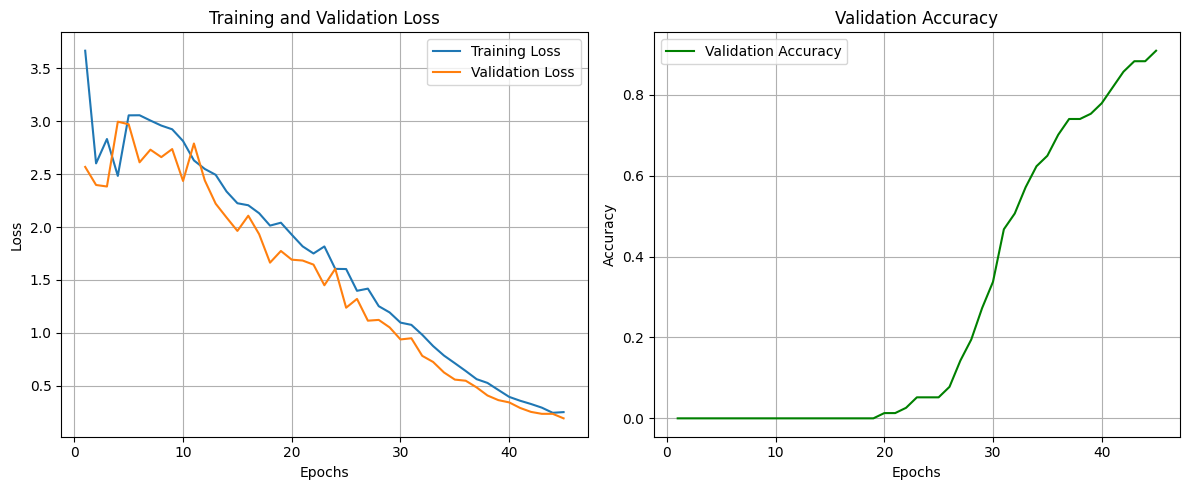


Final Validation Results:
Loss: 0.1907
Accuracy: 0.9091

Example translations:
Input: They visit museums often, Target: Ils visitent souvent des musées, Predicted: Ils visitent souvent des musées
Input: We celebrate birthdays with cake, Target: Nous célébrons les anniversaires avec un gâteau, Predicted: Nous célébrons les anniversaires avec un château
Input: They visit the Eiffel Tower, Target: Ils visitent la tour Eiffel, Predicted: Ils visitent la tour Eiffel
Input: We travel by train, Target: Nous voyageons en train, Predicted: Nous voyageons en train
Input: We plant flowers in the garden, Target: Nous plantons des fleurs dans le jardin, Predicted: Nous plantons des fleurs dans le jardin
Evaluation Loss: 0.1907342029171392, Accuracy: 0.9090909090909091


In [3]:
# English to French translation dataset
english_to_french = [
    ("I am cold", "J'ai froid"),
    ("You are tired", "Tu es fatigué"),
    ("He is hungry", "Il a faim"),
    ("She is happy", "Elle est heureuse"),
    ("We are friends", "Nous sommes amis"),
    ("They are students", "Ils sont étudiants"),
    ("The cat is sleeping", "Le chat dort"),
    ("The sun is shining", "Le soleil brille"),
    ("We love music", "Nous aimons la musique"),
    ("She speaks French fluently", "Elle parle français couramment"),
    ("He enjoys reading books", "Il aime lire des livres"),
    ("They play soccer every weekend", "Ils jouent au football chaque week-end"),
    ("The movie starts at 7 PM", "Le film commence à 19 heures"),
    ("She wears a red dress", "Elle porte une robe rouge"),
    ("We cook dinner together", "Nous cuisinons le dîner ensemble"),
    ("He drives a blue car", "Il conduit une voiture bleue"),
    ("They visit museums often", "Ils visitent souvent des musées"),
    ("The restaurant serves delicious food", "Le restaurant sert une délicieuse cuisine"),
    ("She studies mathematics at university", "Elle étudie les mathématiques à l'université"),
    ("We watch movies on Fridays", "Nous regardons des films le vendredi"),
    ("He listens to music while jogging", "Il écoute de la musique en faisant du jogging"),
    ("They travel around the world", "Ils voyagent autour du monde"),
    ("The book is on the table", "Le livre est sur la table"),
    ("She dances gracefully", "Elle danse avec grâce"),
    ("We celebrate birthdays with cake", "Nous célébrons les anniversaires avec un gâteau"),
    ("He works hard every day", "Il travaille dur tous les jours"),
    ("They speak different languages", "Ils parlent différentes langues"),
    ("The flowers bloom in spring", "Les fleurs fleurissent au printemps"),
    ("She writes poetry in her free time", "Elle écrit de la poésie pendant son temps libre"),
    ("We learn something new every day", "Nous apprenons quelque chose de nouveau chaque jour"),
    ("The dog barks loudly", "Le chien aboie bruyamment"),
    ("He sings beautifully", "Il chante magnifiquement"),
    ("They swim in the pool", "Ils nagent dans la piscine"),
    ("The birds chirp in the morning", "Les oiseaux gazouillent le matin"),
    ("She teaches English at school", "Elle enseigne l'anglais à l'école"),
    ("We eat breakfast together", "Nous prenons le petit déjeuner ensemble"),
    ("He paints landscapes", "Il peint des paysages"),
    ("They laugh at the joke", "Ils rient de la blague"),
    ("The clock ticks loudly", "L'horloge tic-tac bruyamment"),
    ("She runs in the park", "Elle court dans le parc"),
    ("We travel by train", "Nous voyageons en train"),
    ("He writes a letter", "Il écrit une lettre"),
    ("They read books at the library", "Ils lisent des livres à la bibliothèque"),
    ("The baby cries", "Le bébé pleure"),
    ("She studies hard for exams", "Elle étudie dur pour les examens"),
    ("We plant flowers in the garden", "Nous plantons des fleurs dans le jardin"),
    ("He fixes the car", "Il répare la voiture"),
    ("They drink coffee in the morning", "Ils boivent du café le matin"),
    ("The sun sets in the evening", "Le soleil se couche le soir"),
    ("She dances at the party", "Elle danse à la fête"),
    ("We play music at the concert", "Nous jouons de la musique au concert"),
    ("He cooks dinner for his family", "Il cuisine le dîner pour sa famille"),
    ("They study French grammar", "Ils étudient la grammaire française"),
    ("The rain falls gently", "La pluie tombe doucement"),
    ("She sings a song", "Elle chante une chanson"),
    ("We watch a movie together", "Nous regardons un film ensemble"),
    ("He sleeps deeply", "Il dort profondément"),
    ("They travel to Paris", "Ils voyagent à Paris"),
    ("The children play in the park", "Les enfants jouent dans le parc"),
    ("She walks along the beach", "Elle se promène le long de la plage"),
    ("We talk on the phone", "Nous parlons au téléphone"),
    ("He waits for the bus", "Il attend le bus"),
    ("They visit the Eiffel Tower", "Ils visitent la tour Eiffel"),
    ("The stars twinkle at night", "Les étoiles scintillent la nuit"),
    ("She dreams of flying", "Elle rêve de voler"),
    ("We work in the office", "Nous travaillons au bureau"),
    ("He studies history", "Il étudie l'histoire"),
    ("They listen to the radio", "Ils écoutent la radio"),
    ("The wind blows gently", "Le vent souffle doucement"),
    ("She swims in the ocean", "Elle nage dans l'océan"),
    ("We dance at the wedding", "Nous dansons au mariage"),
    ("He climbs the mountain", "Il gravit la montagne"),
    ("They hike in the forest", "Ils font de la randonnée dans la forêt"),
    ("The cat meows loudly", "Le chat miaule bruyamment"),
    ("She paints a picture", "Elle peint un tableau"),
    ("We build a sandcastle", "Nous construisons un château de sable"),
    ("He sings in the choir", "Il chante dans le chœur")
]
     

# Special tokens for the start and end of sequences
SOS_token = 0  # Start Of Sequence Token
EOS_token = 1  # End Of Sequence Token

# Preparing the word to index mapping and vice versa
word_to_index = {"SOS": SOS_token, "EOS": EOS_token}
for pair in english_to_french:
    for word in pair[0].split() + pair[1].split():
        if word not in word_to_index:
            word_to_index[word] = len(word_to_index)

index_to_word = {i: word for word, i in word_to_index.items()}

class TranslationDataset(Dataset):
    """Custom Dataset class for handling translation pairs."""
    def __init__(self, dataset, word_to_index):
        self.dataset = dataset
        self.word_to_index = word_to_index

    def __len__(self):
        # Returns the total number of translation pairs in the dataset
        return len(self.dataset)

    def __getitem__(self, idx):
        # Retrieves a translation pair by index, converts words to indices,
        # and adds the EOS token at the end of each sentence.
        input_sentence, target_sentence = self.dataset[idx]
        input_indices = [self.word_to_index[word] for word in input_sentence.split()] + [EOS_token]
        target_indices = [self.word_to_index[word] for word in target_sentence.split()] + [EOS_token]
        return torch.tensor(input_indices, dtype=torch.long), torch.tensor(target_indices, dtype=torch.long)

# Creating a DataLoader to batch and shuffle the dataset
translation_dataset = TranslationDataset(english_to_french, word_to_index)
dataloader = DataLoader(translation_dataset, batch_size=1, shuffle=True)

class Encoder(nn.Module):
    """The Encoder part of the seq2seq model."""
    def __init__(self, input_size, hidden_size):
        super(Encoder, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_size, hidden_size)  # Embedding layer
        self.gru = nn.GRU(hidden_size, hidden_size)  # GRU layer

    def forward(self, input, hidden):
        # Forward pass for the encoder
        embedded = self.embedding(input).view(1, 1, -1)
        output, hidden = self.gru(embedded, hidden)
        return output, hidden

    def initHidden(self):
        # Initializes hidden state
        return torch.zeros(1, 1, self.hidden_size, device=device)

class Decoder(nn.Module):
    """The Decoder part of the seq2seq model."""
    def __init__(self, hidden_size, output_size):
        super(Decoder, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(output_size, hidden_size)  # Embedding layer
        self.gru = nn.GRU(hidden_size, hidden_size)  # GRU layer
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output, hidden = self.gru(embedded, hidden)
        output = self.softmax(self.out(output[0]))
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

# Assuming all words in the dataset + 'SOS' and 'EOS' tokens are included in word_to_index
input_size = len(word_to_index)
hidden_size = 256  # Adjust according to your preference
output_size = len(word_to_index)

encoder = Encoder(input_size=input_size, hidden_size=hidden_size).to(device)
decoder = Decoder(hidden_size=hidden_size, output_size=output_size).to(device)

# Set the learning rate for optimization
learning_rate = 0.008

# Initializing optimizers for both encoder and decoder with Adam optimizer
encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)

def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion):
    # Initialize encoder hidden state
    encoder_hidden = encoder.initHidden()

    # Clear gradients for optimizers
    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    # Calculate the length of input and target tensors
    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    # Initialize loss
    loss = 0

    # Encoding each word in the input
    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(input_tensor[ei].unsqueeze(0), encoder_hidden)

    # Decoder's first input is the SOS token
    decoder_input = torch.tensor([[SOS_token]], device=device)

    # Decoder starts with the encoder's last hidden state
    decoder_hidden = encoder_hidden

    # Decoding loop
    for di in range(target_length):
        decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
        # Choose top1 word from decoder's output
        topv, topi = decoder_output.topk(1)
        decoder_input = topi.squeeze().detach()  # Detach from history as input

        # Calculate loss
        loss += criterion(decoder_output, target_tensor[di].unsqueeze(0))
        if decoder_input.item() == EOS_token:  # Stop if EOS token is generated
            break

    # Backpropagation
    loss.backward()

    # Update encoder and decoder parameters
    encoder_optimizer.step()
    decoder_optimizer.step()

    # Return average loss
    return loss.item() / target_length

# Negative Log Likelihood Loss function for calculating loss
criterion = nn.NLLLoss()

# Set number of epochs for training
n_epochs = 45

# Lists to store training and validation metrics
train_losses = []
val_losses = []
val_accuracies = []

# Training loop
for epoch in range(n_epochs):
    # Training phase
    encoder.train()
    decoder.train()
    total_train_loss = 0
    
    for input_tensor, target_tensor in dataloader:
        # Move tensors to the correct device
        input_tensor = input_tensor[0].to(device)
        target_tensor = target_tensor[0].to(device)

        # Perform a single training step and update total loss
        loss = train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion)
        total_train_loss += loss
    
    # Calculate average training loss for this epoch
    avg_train_loss = total_train_loss / len(dataloader)
    train_losses.append(avg_train_loss)
    
    # Validation phase - using the same dataset
    encoder.eval()
    decoder.eval()
    total_val_loss = 0
    correct_predictions = 0
    
    with torch.no_grad():
        for input_tensor, target_tensor in dataloader:  # Using the same dataloader
            # Move tensors to the correct device
            input_tensor = input_tensor[0].to(device)
            target_tensor = target_tensor[0].to(device)
            
            # Initialize encoder hidden state
            encoder_hidden = encoder.initHidden()
            
            input_length = input_tensor.size(0)
            target_length = target_tensor.size(0)
            
            # Encoding step
            for ei in range(input_length):
                encoder_output, encoder_hidden = encoder(input_tensor[ei].unsqueeze(0), encoder_hidden)
            
            # Decoding step
            decoder_input = torch.tensor([[SOS_token]], device=device)
            decoder_hidden = encoder_hidden
            
            loss = 0
            predicted_indices = []
            
            for di in range(target_length):
                decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
                topv, topi = decoder_output.topk(1)
                predicted_indices.append(topi.item())
                decoder_input = topi.squeeze().detach()
                
                loss += criterion(decoder_output, target_tensor[di].unsqueeze(0))
                if decoder_input.item() == EOS_token:
                    break
            
            # Calculate validation loss
            total_val_loss += loss.item() / target_length
            
            # Check if prediction is correct (exact match)
            if predicted_indices == target_tensor.tolist():
                correct_predictions += 1
    
    # Calculate average validation loss and accuracy for this epoch
    avg_val_loss = total_val_loss / len(dataloader)
    val_losses.append(avg_val_loss)
    
    val_accuracy = correct_predictions / len(dataloader)
    val_accuracies.append(val_accuracy)
    
    # Print metrics every 5 epochs
    if epoch % 5 == 0 or epoch == n_epochs - 1:
        print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

def evaluate_and_show_examples(encoder, decoder, dataloader, criterion, n_examples=10):
    # Switch model to evaluation mode
    encoder.eval()
    decoder.eval()

    total_loss = 0
    correct_predictions = 0

    # No gradient calculation
    with torch.no_grad():
        for i, (input_tensor, target_tensor) in enumerate(dataloader):
            # Move tensors to the correct device
            input_tensor = input_tensor[0].to(device)
            target_tensor = target_tensor[0].to(device)

            encoder_hidden = encoder.initHidden()

            input_length = input_tensor.size(0)
            target_length = target_tensor.size(0)

            loss = 0

            # Encoding step
            for ei in range(input_length):
                encoder_output, encoder_hidden = encoder(input_tensor[ei].unsqueeze(0), encoder_hidden)

            # Decoding step
            decoder_input = torch.tensor([[SOS_token]], device=device)
            decoder_hidden = encoder_hidden

            predicted_indices = []

            for di in range(target_length):
                decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
                topv, topi = decoder_output.topk(1)
                predicted_indices.append(topi.item())
                decoder_input = topi.squeeze().detach()

                loss += criterion(decoder_output, target_tensor[di].unsqueeze(0))
                if decoder_input.item() == EOS_token:
                    break

            # Calculate and print loss and accuracy for the evaluation
            total_loss += loss.item() / target_length
            if predicted_indices == target_tensor.tolist():
                correct_predictions += 1

            # Optionally, print some examples
            if i < n_examples:
                predicted_sentence = ' '.join([index_to_word[index] for index in predicted_indices if index not in (SOS_token, EOS_token)])
                target_sentence = ' '.join([index_to_word[index.item()] for index in target_tensor if index.item() not in (SOS_token, EOS_token)])
                input_sentence = ' '.join([index_to_word[index.item()] for index in input_tensor if index.item() not in (SOS_token, EOS_token)])

                print(f'Input: {input_sentence}, Target: {target_sentence}, Predicted: {predicted_sentence}')

        # Print overall evaluation results
        average_loss = total_loss / len(dataloader)
        accuracy = correct_predictions / len(dataloader)
        print(f'Evaluation Loss: {average_loss}, Accuracy: {accuracy}')

# Visualize training and validation loss
plt.figure(figsize=(12, 5))

# Plot losses
plt.subplot(1, 2, 1)
plt.plot(range(1, n_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, n_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, n_epochs + 1), val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('english2french_training_metrics.png')
plt.show()

# Print final validation metrics
final_val_loss = val_losses[-1]
final_val_accuracy = val_accuracies[-1]
print(f'\nFinal Validation Results:')
print(f'Loss: {final_val_loss:.4f}')
print(f'Accuracy: {final_val_accuracy:.4f}')

# Perform evaluation with examples
print(f'\nExample translations:')
evaluate_and_show_examples(encoder, decoder, dataloader, criterion, n_examples=5)
     


2. Repeat problem 1, this time extend the network with attention. Train the model on the entire dataset and evaluate it on the entire dataset. Report training loss, validation loss, and validation accuracy. Also, try some qualitative validation as well, asking the network to generate French translations for some English sentences. Also, compare the results against problem 1.

** I have elected to implement the multi-head attention mechanism described in Attention Is All You Need **


Epoch 1/45, Train Loss: 3.7274, Val Loss: 2.5103, Val Accuracy: 0.0000
Epoch 6/45, Train Loss: 2.2033, Val Loss: 1.6841, Val Accuracy: 0.0000
Epoch 11/45, Train Loss: 0.7492, Val Loss: 0.5089, Val Accuracy: 0.4026
Epoch 16/45, Train Loss: 0.1667, Val Loss: 0.1081, Val Accuracy: 0.9481
Epoch 21/45, Train Loss: 0.0367, Val Loss: 0.0225, Val Accuracy: 0.9870
Epoch 26/45, Train Loss: 0.0184, Val Loss: 0.0112, Val Accuracy: 1.0000
Epoch 31/45, Train Loss: 0.0125, Val Loss: 0.0080, Val Accuracy: 1.0000
Epoch 36/45, Train Loss: 0.0102, Val Loss: 0.0062, Val Accuracy: 1.0000
Epoch 41/45, Train Loss: 0.0080, Val Loss: 0.0051, Val Accuracy: 1.0000
Epoch 45/45, Train Loss: 0.0073, Val Loss: 0.0044, Val Accuracy: 1.0000


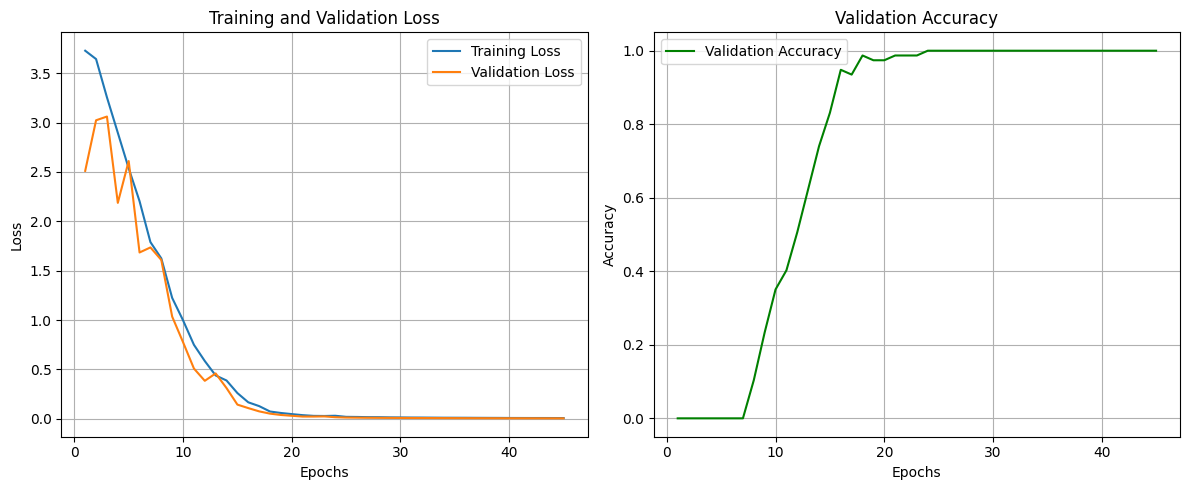


Final Validation Results:
Loss: 0.0044
Accuracy: 1.0000

Example translations:
Input: She studies mathematics at university, Target: Elle étudie les mathématiques à l'université, Predicted: Elle étudie les mathématiques à l'université
Input: He sleeps deeply, Target: Il dort profondément, Predicted: Il dort profondément
Input: We watch a movie together, Target: Nous regardons un film ensemble, Predicted: Nous regardons un film ensemble
Input: They listen to the radio, Target: Ils écoutent la radio, Predicted: Ils écoutent la radio
Input: They swim in the pool, Target: Ils nagent dans la piscine, Predicted: Ils nagent dans la piscine
Evaluation Loss: 0.004422947746455603, Accuracy: 1.0


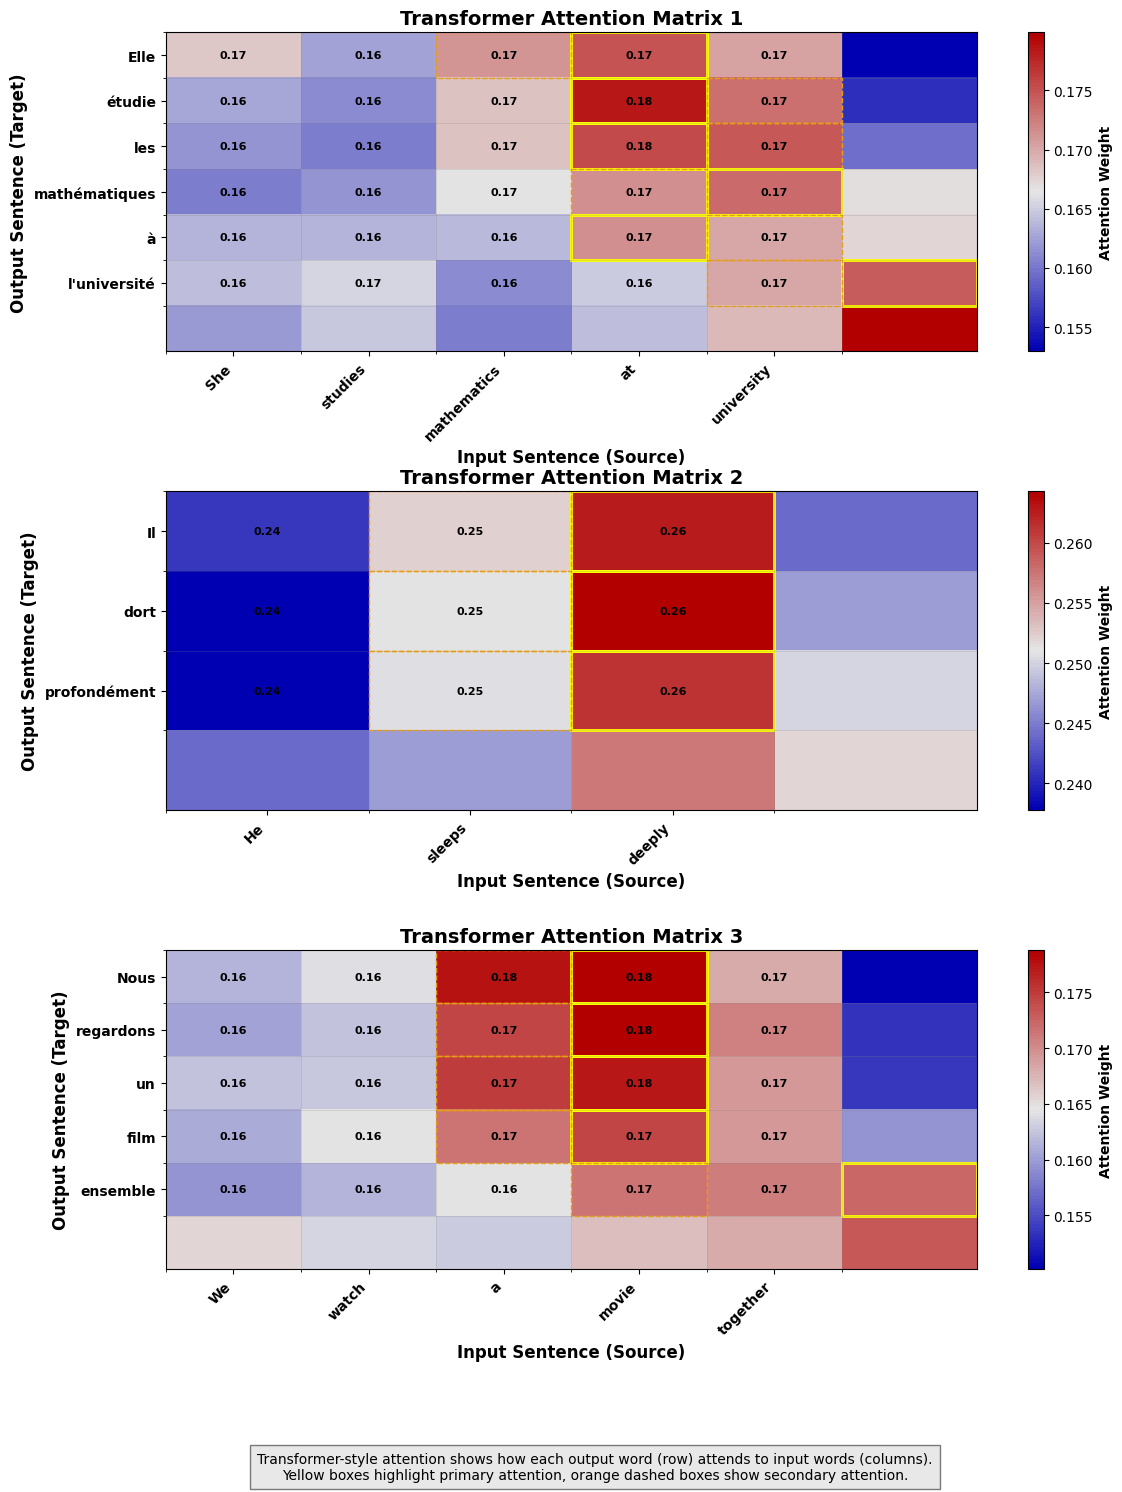

In [6]:
class TranslationDataset(Dataset):
    
    """Custom Dataset class for handling translation pairs."""
    def __init__(self, dataset, word_to_index):
        self.dataset = dataset
        self.word_to_index = word_to_index

    def __len__(self):
        # Returns the total number of translation pairs in the dataset
        return len(self.dataset)

    def __getitem__(self, idx):
        # Retrieves a translation pair by index, converts words to indices,
        # and adds the EOS token at the end of each sentence.
        input_sentence, target_sentence = self.dataset[idx]
        input_indices = [self.word_to_index[word] for word in input_sentence.split()] + [EOS_token]
        target_indices = [self.word_to_index[word] for word in target_sentence.split()] + [EOS_token]
        return torch.tensor(input_indices, dtype=torch.long), torch.tensor(target_indices, dtype=torch.long)

# Creating a DataLoader to batch and shuffle the dataset
translation_dataset = TranslationDataset(english_to_french, word_to_index)
dataloader = DataLoader(translation_dataset, batch_size=1, shuffle=True)

class Encoder(nn.Module):
    """The Encoder part of the seq2seq model with attention."""
    def __init__(self, input_size, hidden_size):
        super(Encoder, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_size, hidden_size)  # Embedding layer
        self.gru = nn.GRU(hidden_size, hidden_size, batch_first=True)  # GRU layer

    def forward(self, input, hidden):
        # Forward pass for the encoder
        embedded = self.embedding(input).view(1, 1, -1)
        output, hidden = self.gru(embedded, hidden)
        return output, hidden

    def initHidden(self):
        # Initializes hidden state
        return torch.zeros(1, 1, self.hidden_size, device=device)

class MultiHeadAttention(nn.Module):
    """Multi-Head Attention mechanism from 'Attention Is All You Need' paper."""
    def __init__(self, hidden_size, num_heads=4, dropout=0.1):
        super(MultiHeadAttention, self).__init__()
        
        # Ensure hidden_size is divisible by num_heads
        assert hidden_size % num_heads == 0, "hidden_size must be divisible by num_heads"
        
        self.hidden_size = hidden_size
        self.num_heads = num_heads
        self.head_dim = hidden_size // num_heads
        
        # Linear projections for Query, Key, and Value
        self.query_proj = nn.Linear(hidden_size, hidden_size)
        self.key_proj = nn.Linear(hidden_size, hidden_size)
        self.value_proj = nn.Linear(hidden_size, hidden_size)
        
        # Output projection
        self.output_proj = nn.Linear(hidden_size, hidden_size)
        
        # Dropout for regularization
        self.dropout = nn.Dropout(dropout)
        
        # Scaling factor for dot product attention
        self.scale = torch.sqrt(torch.FloatTensor([self.head_dim])).to(device)
        
    def forward(self, query, key, value, mask=None):
        # query, key, value shapes: [batch_size, seq_len, hidden_size]
        # For decoder self-attention: query = decoder hidden state, key/value = encoder outputs
        
        batch_size = query.shape[0]
        
        # Linear projections and split into multiple heads
        # [batch_size, seq_len, hidden_size]
        Q = self.query_proj(query)
        K = self.key_proj(key)
        V = self.value_proj(value)
        
        # Reshape for multi-head attention
        # [batch_size, seq_len, num_heads, head_dim]
        Q = Q.view(batch_size, -1, self.num_heads, self.head_dim)
        K = K.view(batch_size, -1, self.num_heads, self.head_dim)
        V = V.view(batch_size, -1, self.num_heads, self.head_dim)
        
        # Transpose to [batch_size, num_heads, seq_len, head_dim]
        Q = Q.permute(0, 2, 1, 3)
        K = K.permute(0, 2, 1, 3)
        V = V.permute(0, 2, 1, 3)
        
        # Calculate scaled dot-product attention
        # [batch_size, num_heads, query_len, key_len]
        energy = torch.matmul(Q, K.permute(0, 1, 3, 2)) / self.scale
        
        # Apply mask if provided (for padding or causal attention)
        if mask is not None:
            energy = energy.masked_fill(mask == 0, -1e10)
        
        # Apply softmax to get attention weights
        # [batch_size, num_heads, query_len, key_len]
        attention = torch.softmax(energy, dim=-1)
        
        # Apply dropout
        attention = self.dropout(attention)
        
        # Weighted sum of values
        # [batch_size, num_heads, query_len, head_dim]
        x = torch.matmul(attention, V)
        
        # Transpose and reshape back
        # [batch_size, query_len, hidden_size]
        x = x.permute(0, 2, 1, 3).contiguous()
        x = x.view(batch_size, -1, self.hidden_size)
        
        # Final linear projection
        output = self.output_proj(x)
        
        # Return both the output and the attention weights for visualization
        return output, attention


class Attention(nn.Module):
    """Wrapper around Multi-Head Attention for compatibility with the existing code."""
    def __init__(self, hidden_size):
        super(Attention, self).__init__()
        self.hidden_size = hidden_size
        
        # Use the Multi-Head Attention mechanism
        self.multihead_attn = MultiHeadAttention(hidden_size, num_heads=4)
        
    def forward(self, hidden, encoder_outputs):
        # Adapt the interface to work with the existing seq2seq model
        # hidden shape: [1, 1, hidden_size]
        # encoder_outputs shape: [seq_len, 1, hidden_size]
        
        # Reshape inputs to match MultiHeadAttention expectations
        # [1, seq_len, hidden_size]
        encoder_outputs = encoder_outputs.permute(1, 0, 2)
        
        # Use hidden state as query, encoder outputs as key and value
        # Expand hidden to match batch dimension of encoder_outputs
        # [1, 1, hidden_size]
        query = hidden.permute(1, 0, 2)
        
        # Compute multi-head attention
        # output shape: [1, 1, hidden_size]
        # attn_weights shape: [1, num_heads, 1, seq_len]
        _, attn_weights = self.multihead_attn(query, encoder_outputs, encoder_outputs)
        
        # Average attention weights across heads for visualization
        # [1, seq_len]
        attn_weights = attn_weights.mean(dim=1).squeeze(0)
        
        return attn_weights

class AttentionDecoder(nn.Module):
    """The Decoder part of the seq2seq model with Transformer-style attention."""
    def __init__(self, hidden_size, output_size, dropout=0.1):
        super(AttentionDecoder, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Embedding layer
        self.embedding = nn.Embedding(output_size, hidden_size)
        
        # Multi-head attention mechanism from Transformer
        self.attention = Attention(hidden_size)
        
        # Add layer normalization for stability (from Transformer)
        self.layer_norm1 = nn.LayerNorm(hidden_size)
        self.layer_norm2 = nn.LayerNorm(hidden_size)
        
        # Feed-forward network (from Transformer)
        self.feed_forward = nn.Sequential(
            nn.Linear(hidden_size, hidden_size * 4),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_size * 4, hidden_size)
        )
        
        # GRU for maintaining sequence state (hybrid approach)
        self.gru = nn.GRU(hidden_size * 2, hidden_size, batch_first=True)
        
        # Output layer
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
        
        # Dropout for regularization
        self.dropout = nn.Dropout(dropout)

    def forward(self, input, hidden, encoder_outputs):
        # input shape: [1]
        # hidden shape: [1, 1, hidden_size]
        # encoder_outputs shape: [seq_len, 1, hidden_size]
        
        # Get embedding of input
        # [1, 1, hidden_size]
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)
        
        # Calculate attention weights using the Transformer-style attention
        # [1, seq_len]
        attn_weights = self.attention(hidden, encoder_outputs)
        
        # Calculate context vector using attention weights
        # [1, 1, hidden_size]
        context = torch.bmm(attn_weights.unsqueeze(0), encoder_outputs.permute(1, 0, 2))
        
        # Apply residual connection and layer normalization (Transformer style)
        # First combine the context with the embedded input
        # [1, 1, hidden_size * 2]
        combined = torch.cat((embedded, context), dim=2)
        
        # Pass through GRU (maintaining the RNN component for sequence modeling)
        # output shape: [1, 1, hidden_size]
        # hidden shape: [1, 1, hidden_size]
        gru_output, hidden = self.gru(combined, hidden)
        
        # Apply layer normalization
        normalized_output = self.layer_norm1(gru_output)
        
        # Feed-forward network with residual connection (Transformer style)
        ff_output = normalized_output + self.feed_forward(normalized_output)
        ff_output = self.layer_norm2(ff_output)
        
        # Final output projection
        # [1, output_size]
        output = self.softmax(self.out(ff_output.squeeze(0)))
        
        # Return output, hidden state, and attention weights for visualization
        return output, hidden, attn_weights

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

# Assuming all words in the dataset + 'SOS' and 'EOS' tokens are included in word_to_index
input_size = len(word_to_index)
hidden_size = 256  # Adjust according to your preference
output_size = len(word_to_index)

encoder = Encoder(input_size=input_size, hidden_size=hidden_size).to(device)
decoder = AttentionDecoder(hidden_size=hidden_size, output_size=output_size).to(device)

# Set the learning rate for optimization
learning_rate = 0.008

# Initializing optimizers for both encoder and decoder with Adam optimizer
encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)

def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion):
    # Initialize encoder hidden state
    encoder_hidden = encoder.initHidden()

    # Clear gradients for optimizers
    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    # Calculate the length of input and target tensors
    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    # Initialize loss
    loss = 0
    
    # Store encoder outputs for attention
    encoder_outputs = torch.zeros(input_length, 1, encoder.hidden_size, device=device)

    # Encoding each word in the input
    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(input_tensor[ei].unsqueeze(0), encoder_hidden)
        encoder_outputs[ei] = encoder_output

    # Decoder's first input is the SOS token
    decoder_input = torch.tensor([[SOS_token]], device=device)

    # Decoder starts with the encoder's last hidden state
    decoder_hidden = encoder_hidden
    
    # Store attention weights for visualization
    attention_weights = torch.zeros(target_length, input_length)

    # Decoding loop
    for di in range(target_length):
        decoder_output, decoder_hidden, attn_weights = decoder(decoder_input, decoder_hidden, encoder_outputs)
        
        # Store attention weights
        attention_weights[di] = attn_weights.squeeze()
        
        # Choose top1 word from decoder's output
        topv, topi = decoder_output.topk(1)
        decoder_input = topi.squeeze().detach()  # Detach from history as input

        # Calculate loss
        loss += criterion(decoder_output, target_tensor[di].unsqueeze(0))
        if decoder_input.item() == EOS_token:  # Stop if EOS token is generated
            break

    # Backpropagation
    loss.backward()

    # Update encoder and decoder parameters
    encoder_optimizer.step()
    decoder_optimizer.step()

    # Return average loss and attention weights
    return loss.item() / target_length, attention_weights

# Negative Log Likelihood Loss function for calculating loss
criterion = nn.NLLLoss()

# Set number of epochs for training
n_epochs = 45

# Lists to store training and validation metrics
train_losses = []
val_losses = []
val_accuracies = []

# Training loop
for epoch in range(n_epochs):
    # Training phase
    encoder.train()
    decoder.train()
    total_train_loss = 0
    
    for input_tensor, target_tensor in dataloader:
        # Move tensors to the correct device
        input_tensor = input_tensor[0].to(device)
        target_tensor = target_tensor[0].to(device)

        # Perform a single training step and update total loss
        loss, _ = train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion)
        total_train_loss += loss
    
    # Calculate average training loss for this epoch
    avg_train_loss = total_train_loss / len(dataloader)
    train_losses.append(avg_train_loss)
    
    # Validation phase - using the same dataset
    encoder.eval()
    decoder.eval()
    total_val_loss = 0
    correct_predictions = 0
    
    with torch.no_grad():
        for input_tensor, target_tensor in dataloader:  # Using the same dataloader
            # Move tensors to the correct device
            input_tensor = input_tensor[0].to(device)
            target_tensor = target_tensor[0].to(device)
            
            # Initialize encoder hidden state
            encoder_hidden = encoder.initHidden()
            
            input_length = input_tensor.size(0)
            target_length = target_tensor.size(0)
            
            # Store encoder outputs for attention
            encoder_outputs = torch.zeros(input_length, 1, encoder.hidden_size, device=device)
            
            # Encoding step
            for ei in range(input_length):
                encoder_output, encoder_hidden = encoder(input_tensor[ei].unsqueeze(0), encoder_hidden)
                encoder_outputs[ei] = encoder_output
            
            # Decoding step
            decoder_input = torch.tensor([[SOS_token]], device=device)
            decoder_hidden = encoder_hidden
            
            loss = 0
            predicted_indices = []
            attention_weights = torch.zeros(target_length, input_length)
            
            for di in range(target_length):
                decoder_output, decoder_hidden, attn_weights = decoder(decoder_input, decoder_hidden, encoder_outputs)
                attention_weights[di] = attn_weights.squeeze()
                topv, topi = decoder_output.topk(1)
                predicted_indices.append(topi.item())
                decoder_input = topi.squeeze().detach()
                
                loss += criterion(decoder_output, target_tensor[di].unsqueeze(0))
                if decoder_input.item() == EOS_token:
                    break
            
            # Calculate validation loss
            total_val_loss += loss.item() / target_length
            
            # Check if prediction is correct (exact match)
            if predicted_indices == target_tensor.tolist():
                correct_predictions += 1
    
    # Calculate average validation loss and accuracy for this epoch
    avg_val_loss = total_val_loss / len(dataloader)
    val_losses.append(avg_val_loss)
    
    val_accuracy = correct_predictions / len(dataloader)
    val_accuracies.append(val_accuracy)
    
    # Print metrics every 5 epochs
    if epoch % 5 == 0 or epoch == n_epochs - 1:
        print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

def evaluate_and_show_examples(encoder, decoder, dataloader, criterion, n_examples=10):
    # Switch model to evaluation mode
    encoder.eval()
    decoder.eval()

    total_loss = 0
    correct_predictions = 0
    all_attention_weights = []

    # No gradient calculation
    with torch.no_grad():
        for i, (input_tensor, target_tensor) in enumerate(dataloader):
            # Move tensors to the correct device
            input_tensor = input_tensor[0].to(device)
            target_tensor = target_tensor[0].to(device)

            encoder_hidden = encoder.initHidden()

            input_length = input_tensor.size(0)
            target_length = target_tensor.size(0)

            loss = 0
            
            # Store encoder outputs for attention
            encoder_outputs = torch.zeros(input_length, 1, encoder.hidden_size, device=device)

            # Encoding step
            for ei in range(input_length):
                encoder_output, encoder_hidden = encoder(input_tensor[ei].unsqueeze(0), encoder_hidden)
                encoder_outputs[ei] = encoder_output

            # Decoding step
            decoder_input = torch.tensor([[SOS_token]], device=device)
            decoder_hidden = encoder_hidden

            predicted_indices = []
            attention_weights = torch.zeros(target_length, input_length)

            for di in range(target_length):
                decoder_output, decoder_hidden, attn_weights = decoder(decoder_input, decoder_hidden, encoder_outputs)
                attention_weights[di] = attn_weights.squeeze()
                topv, topi = decoder_output.topk(1)
                predicted_indices.append(topi.item())
                decoder_input = topi.squeeze().detach()

                loss += criterion(decoder_output, target_tensor[di].unsqueeze(0))
                if decoder_input.item() == EOS_token:
                    break

            # Calculate and print loss and accuracy for the evaluation
            total_loss += loss.item() / target_length
            if predicted_indices == target_tensor.tolist():
                correct_predictions += 1

            # Optionally, print some examples and plot attention
            if i < n_examples:
                predicted_sentence = ' '.join([index_to_word[index] for index in predicted_indices if index not in (SOS_token, EOS_token)])
                target_sentence = ' '.join([index_to_word[index.item()] for index in target_tensor if index.item() not in (SOS_token, EOS_token)])
                input_sentence = ' '.join([index_to_word[index.item()] for index in input_tensor if index.item() not in (SOS_token, EOS_token)])

                print(f'Input: {input_sentence}, Target: {target_sentence}, Predicted: {predicted_sentence}')
                
                # Store attention weights for visualization
                all_attention_weights.append({
                    'input': input_sentence,
                    'output': predicted_sentence,
                    'attention': attention_weights[:len(predicted_indices), :input_length].cpu().numpy()
                })

        # Print overall evaluation results
        average_loss = total_loss / len(dataloader)
        accuracy = correct_predictions / len(dataloader)
        print(f'Evaluation Loss: {average_loss}, Accuracy: {accuracy}')
        
        # Plot attention matrices for the first few examples
        if n_examples > 0 and len(all_attention_weights) > 0:
            plot_attention_matrices(all_attention_weights[:min(n_examples, len(all_attention_weights))])

def plot_attention_matrices(attention_data, n_examples=3):
    """Plot Transformer-style attention matrices for better visualization of word alignments."""
    n = min(n_examples, len(attention_data))
    fig, axes = plt.subplots(n, 1, figsize=(12, 5*n))
    if n == 1:
        axes = [axes]
    
    # Create a custom colormap for better visualization
    # Using a perceptually uniform colormap for better interpretation
    colors = [(0.0, 0.0, 0.7),  # Deep blue for low values
              (0.9, 0.9, 0.9),  # Light gray for middle values
              (0.7, 0.0, 0.0)]  # Deep red for high values
    cmap_name = 'transformer_attention_cmap'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)
    
    for i, data in enumerate(attention_data[:n]):
        ax = axes[i]
        attention = data['attention']
        input_sentence = data['input'].split()
        output_sentence = data['output'].split()
        
        # Display the attention matrix with the custom colormap
        im = ax.imshow(attention, cmap=cm, aspect='auto', interpolation='nearest')
        
        # Add grid to better visualize the alignment between words
        ax.set_xticks(np.arange(-.5, len(input_sentence), 1), minor=True)
        ax.set_yticks(np.arange(-.5, len(output_sentence), 1), minor=True)
        ax.grid(which='minor', color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
        
        # Set labels with better formatting
        ax.set_xticks(range(len(input_sentence)))
        ax.set_yticks(range(len(output_sentence)))
        ax.set_xticklabels(input_sentence, rotation=45, ha='right', fontsize=10, fontweight='bold')
        ax.set_yticklabels(output_sentence, fontsize=10, fontweight='bold')
        
        # Add labels and title with better formatting
        ax.set_xlabel('Input Sentence (Source)', fontsize=12, fontweight='bold')
        ax.set_ylabel('Output Sentence (Target)', fontsize=12, fontweight='bold')
        ax.set_title(f'Transformer Attention Matrix {i+1}', fontsize=14, fontweight='bold')
        
        # Add a colorbar with better formatting
        cbar = fig.colorbar(im, ax=ax)
        cbar.set_label('Attention Weight', fontsize=10, fontweight='bold')
        
        # Add text annotations for better readability
        # Only annotate cells with significant attention to avoid clutter
        for y in range(len(output_sentence)):
            for x in range(len(input_sentence)):
                # Adjust threshold as needed - higher threshold for Transformer attention
                # as it tends to be more distributed
                if attention[y, x] > 0.15:  
                    # Choose text color based on background for better contrast
                    text_color = 'white' if attention[y, x] > 0.4 else 'black'
                    ax.text(x, y, f'{attention[y, x]:.2f}', 
                             ha='center', va='center', color=text_color, 
                             fontsize=8, fontweight='bold')
        
        # Highlight the maximum attention value for each output word
        for y in range(len(output_sentence)):
            # Find top-2 attention positions for each output word (Transformer often distributes attention)
            attention_row = attention[y]
            top_indices = torch.topk(torch.tensor(attention_row), min(2, len(input_sentence))).indices.numpy()
            
            # Highlight primary attention
            rect = plt.Rectangle((top_indices[0]-0.5, y-0.5), 1, 1, fill=False, 
                                edgecolor='yellow', linewidth=2)
            ax.add_patch(rect)
            
            # Highlight secondary attention if available
            if len(top_indices) > 1:
                rect2 = plt.Rectangle((top_indices[1]-0.5, y-0.5), 1, 1, fill=False, 
                                    edgecolor='orange', linewidth=1, linestyle='--')
                ax.add_patch(rect2)
        
        # Add a title explaining the visualization
        if i == 0:
            plt.figtext(0.5, 0.01, 
                      "Transformer-style attention shows how each output word (row) attends to input words (columns).\n" +
                      "Yellow boxes highlight primary attention, orange dashed boxes show secondary attention.", 
                      ha="center", fontsize=10, bbox={"facecolor":"lightgray", "alpha":0.5, "pad":5})
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15)  # Make room for the explanation text
    plt.savefig('transformer_attention_matrices.png')
    plt.show()

# Visualize training and validation loss
plt.figure(figsize=(12, 5))

# Plot losses
plt.subplot(1, 2, 1)
plt.plot(range(1, n_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, n_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, n_epochs + 1), val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('english2french_training_metrics.png')
plt.show()

# Print final validation metrics
final_val_loss = val_losses[-1]
final_val_accuracy = val_accuracies[-1]
print(f'\nFinal Validation Results:')
print(f'Loss: {final_val_loss:.4f}')
print(f'Accuracy: {final_val_accuracy:.4f}')

# Perform evaluation with examples
print(f'\nExample translations:')
evaluate_and_show_examples(encoder, decoder, dataloader, criterion, n_examples=5)
     


3. Repeat problems 1 and 2, this time try to translate from French to English. Train the model on the entire dataset and evaluate it on the entire dataset. Report training loss, validation loss, and validation accuracy. Also, try some qualitative validation as well, asking the network to generate English  translations for some French sentences. Which one seems to be more effective, French-to-English or English-to-French?
